# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

*italicized text*|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Kapildev  | Aryal | Kapildev Aryal | 2.5 Hours | Contribution 25% |
| Member 2: | Samit  | Shrestha| Samitshrestha | 2.5 Hours | Contribution 25% |
| Member 3: | Manesh | Pandit Chhetri | Maneshpanditchhetri |2.5 Hours| Contribution 25% |

 Member 4: | Pawan | Bhusal | Pawanbhusal | 2.5 Hours | Contribution 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

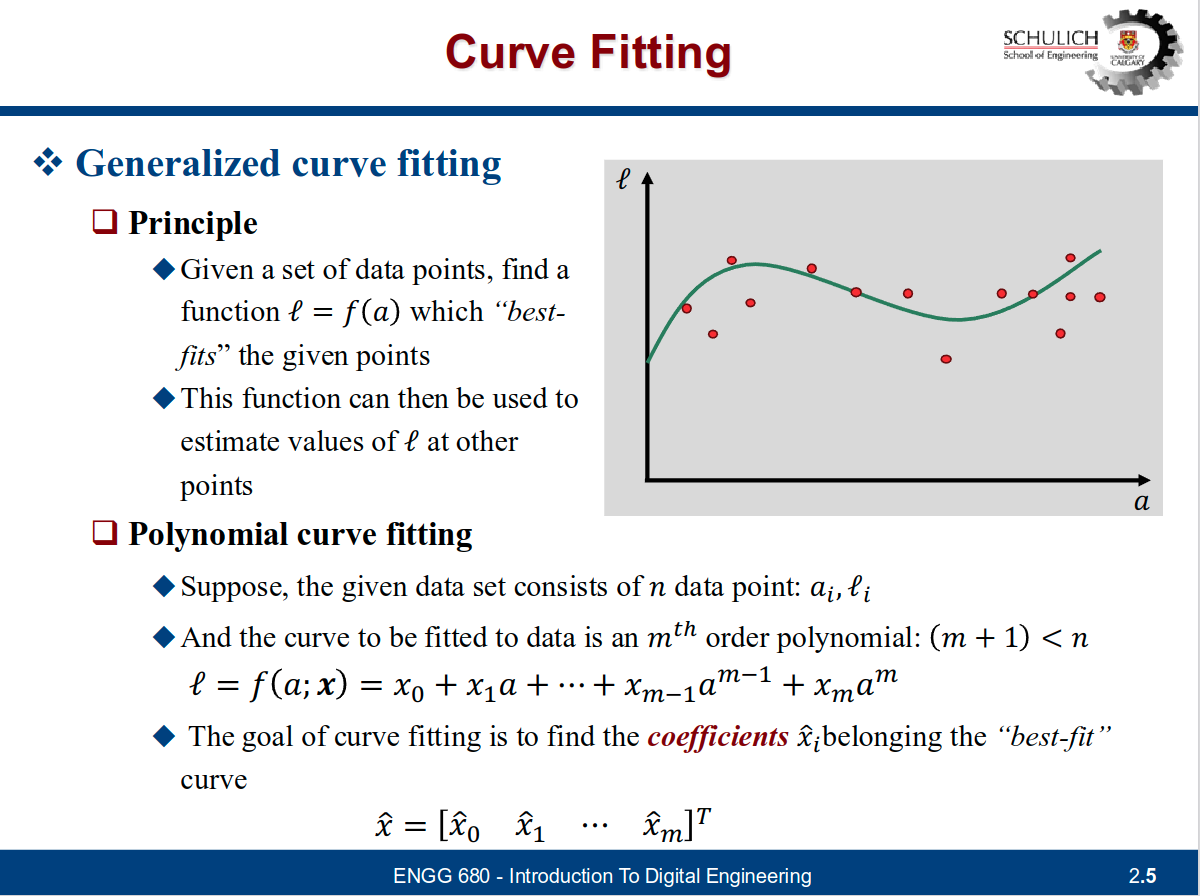

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
# loading data.xlsx file
df_data = pd.read_excel('/content/drive/My Drive/engg680_2024_fall/Lab_Assignment2/data.xlsx')
# converting  data into numpy array
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
# storing the noisy observation into numpy array
l = arr_data[:, 0]
# storing variance of observation into numpy array
l_var = arr_data[:, 1]
# storing true observations into numpy array
l_true = arr_data[:, 2]

In [4]:
# step 3
# define the number of observation n
# (1 mark)
# n is the number of observations
n = len(arr_data)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
# taking identity matrix
P = np.identity(n)

# # define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


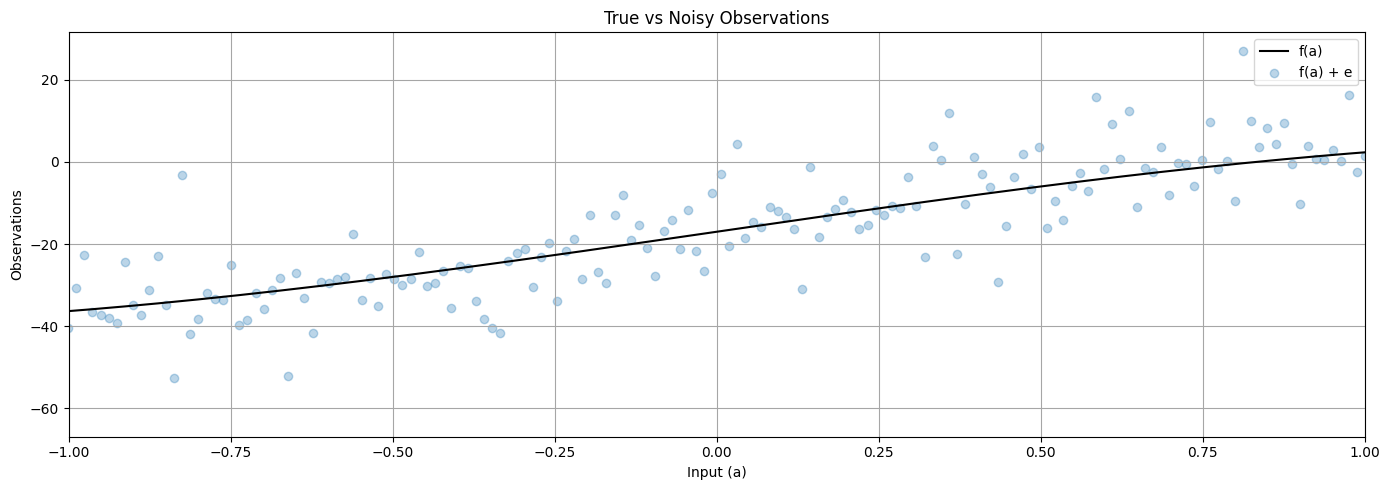

In [5]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

# Create a figure and axis object
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot the true observations as a line plot
ax.plot(a, l_true, label='f(a)', color='k')  # 'k' for black color

# Plot the noisy observations as a scatter plot
ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)

# Set the x-axis limit to be between -1 and 1
ax.set_xlim([-1, 1])

# Add axis labels, title, and legend
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations')
ax.set_title('True vs Noisy Observations')

# Show the grid
ax.grid(True, which='both', ls='-', color='0.65')

# Add a legend
ax.legend()

# Tight layout for better spacing
fig.tight_layout()


In [6]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    # Construct the design matrix A (Vandermonde matrix for polynomial fitting)
    # The design matrix has columns: [a^deg, a^(deg-1), ..., a^1, 1]
    A = np.vander(a, deg + 1)

    # Compute the normal equation: (A^T P A) x = A^T P l
    # First, we need the transpose of A
    A_T = A.T

    # Now, apply the weighting matrix P to A and l
    # P is a diagonal matrix in this case, so we can directly multiply
    A_T_P = A_T @ P
    A_T_P_A = A_T_P @ A  # (A^T P A)

    # Solve for the estimated coefficients x (polynomial coefficients)
    A_T_P_l = A_T_P @ l  # (A^T P l)
    x = np.linalg.inv(A_T_P_A) @ A_T_P_l  # Solve the linear system to get x

    # Calculate the residuals v (difference between observed and predicted)
    l_predicted = A @ x  # Predicted observations based on the fitted polynomial
    v = l - l_predicted  # Residuals: observed - predicted

    # A posteriori variance factor (goodness of fit)
    apv = (v.T @ P @ v) / (n - deg - 1)  # n is the number of observations, deg is polynomial degree

    # Covariance matrix of the estimated coefficients
    cov_x = apv * np.linalg.inv(A_T_P_A)

    return (x, cov_x, apv, v)

In [7]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# Polynomial degree 1
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, deg=1)

# Polynomial degree 3
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, deg=3)

# Polynomial degree 5
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, deg=5)


In [9]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

# Polynomial function for degree 1 (linear)
line_uw = np.polyval(x_deg1, a)

# Polynomial function for degree 3 (cubic)
cubic_uw = np.polyval(x_deg3, a)

# Polynomial function for degree 5 (quintic)
quintic_uw = np.polyval(x_deg5, a)

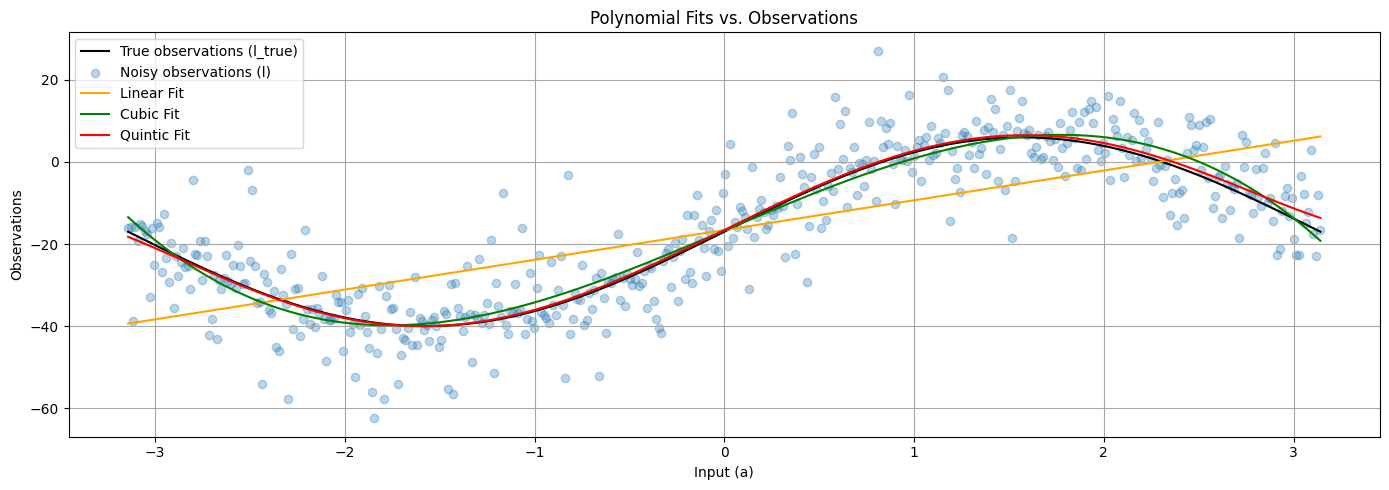

In [11]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot true observations as a line
ax.plot(a, l_true, label='True observations (l_true)', color='k')  # Black line for true observations

# Plot noisy observations as scatter points
ax.scatter(a, l, label='Noisy observations (l)', color='tab:blue', alpha=0.3)  # Blue scatter for noisy observations

# Plot polynomial functions
ax.plot(a, line_uw, label='Linear Fit', color='orange')  # Orange line for linear polynomial
ax.plot(a, cubic_uw, label='Cubic Fit', color='green')   # Green line for cubic polynomial
ax.plot(a, quintic_uw, label='Quintic Fit', color='red')  # Red line for quintic polynomial

# Add labels and legend
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations')
ax.set_title('Polynomial Fits vs. Observations')
ax.legend()

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [12]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
print("A Posteriori Variance Factor for Degree 1 (Linear Fit):", apv_deg1)
print("A Posteriori Variance Factor for Degree 3 (Cubic Fit):", apv_deg3)
print("A Posteriori Variance Factor for Degree 5 (Quintic Fit):", apv_deg5)


A Posteriori Variance Factor for Degree 1 (Linear Fit): 162.742608604322
A Posteriori Variance Factor for Degree 3 (Cubic Fit): 66.13227783131883
A Posteriori Variance Factor for Degree 5 (Quintic Fit): 63.75834463018419


In [21]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# Compute the norms for each polynomial fit
norm_linear = np.linalg.norm(line_uw - l_true)
norm_cubic = np.linalg.norm(cubic_uw - l_true)
norm_quintic = np.linalg.norm(quintic_uw - l_true)

# Compute the L2-norm for each polynomial fit
l2_norm_linear = np.linalg.norm(line_uw - l_true, ord=2)   # L2-norm for linear fit
l2_norm_cubic = np.linalg.norm(cubic_uw - l_true, ord=2)   # L2-norm for cubic fit
l2_norm_quintic = np.linalg.norm(quintic_uw - l_true, ord=2)  # L2-norm for quintic fit

# Print the results
print("Norm between predicted observations and true observations for Degree 1 (Linear Fit):", norm_linear)
print("Norm between predicted observations and true observations for Degree 3 (Cubic Fit):", norm_cubic)
print("Norm between predicted observations and true observations for Degree 5 (Quintic Fit):", norm_quintic)

print("L2-norm between predicted observations and true observations for Degree 1 (Linear Fit):", l2_norm_linear)
print("L2-norm between predicted observations and true observations for Degree 3 (Cubic Fit):", l2_norm_cubic)
print("L2-norm between predicted observations and true observations for Degree 5 (Quintic Fit):", l2_norm_quintic)

Norm between predicted observations and true observations for Degree 1 (Linear Fit): 230.67760813832945
Norm between predicted observations and true observations for Degree 3 (Cubic Fit): 36.07026687266801
Norm between predicted observations and true observations for Degree 5 (Quintic Fit): 5.741606915884715
L2-norm between predicted observations and true observations for Degree 1 (Linear Fit): 230.67760813832945
L2-norm between predicted observations and true observations for Degree 3 (Cubic Fit): 36.07026687266801
L2-norm between predicted observations and true observations for Degree 5 (Quintic Fit): 5.741606915884715


In [22]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
'''
As the polynomial degree increases from linear to cubic to quintic, both the a posteriori variance
factor and norm decrease significantly, indicating a better fit to the true observations.
The linear fit performs the worst, while the cubic and quintic fits are much closer to the true values.
This suggests that higher-degree polynomials can capture the data trend more accurately, but there’s a
need to be cautious of overfitting with very complex models.
'''


'\nAs the polynomial degree increases from linear to cubic to quintic, both the a posteriori variance \nfactor and norm decrease significantly, indicating a better fit to the true observations. \nThe linear fit performs the worst, while the cubic and quintic fits are much closer to the true values. \nThis suggests that higher-degree polynomials can capture the data trend more accurately, but there’s a \nneed to be cautious of overfitting with very complex models.\n'

In [23]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)  # Inverse of the variance values to create the weight matrix

A Posteriori Variance Factor for Degree 1 (Linear Fit): 12.054651233436907
A Posteriori Variance Factor for Degree 3 (Cubic Fit): 1.1444647026537131
A Posteriori Variance Factor for Degree 5 (Quintic Fit): 0.9447009043856548
Norm between predicted observations and true observations for Degree 1 (Linear Fit): 230.67760813832945
Norm between predicted observations and true observations for Degree 3 (Cubic Fit): 36.07026687266801
Norm between predicted observations and true observations for Degree 5 (Quintic Fit): 5.741606915884715
L2-norm between predicted observations and true observations for Degree 1 (Linear Fit): 230.67760813832945
L2-norm between predicted observations and true observations for Degree 3 (Cubic Fit): 36.07026687266801
L2-norm between predicted observations and true observations for Degree 5 (Quintic Fit): 5.741606915884715


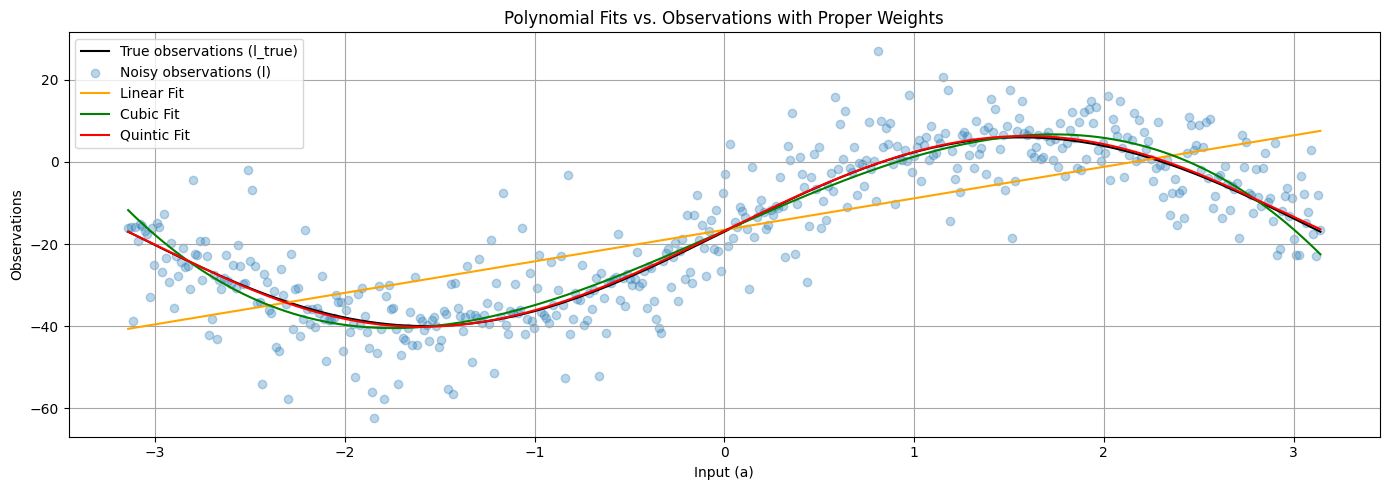

In [25]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

# Call the fit_polynomial_curve function and fetch the results
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, deg=1)
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, deg=3)
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, deg=5)

# Construct polynomial functions for each degree using the estimated coefficients
line_uw = np.polyval(x_deg1, a)  # Linear fit
cubic_uw = np.polyval(x_deg3, a)  # Cubic fit
quintic_uw = np.polyval(x_deg5, a)  # Quintic fit

# Step 8: Plot each polynomial function, noisy observations l, and true observations l_true
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot true observations as a line
ax.plot(a, l_true, label='True observations (l_true)', color='k')

# Plot noisy observations as scatter points
ax.scatter(a, l, label='Noisy observations (l)', color='tab:blue', alpha=0.3)

# Plot polynomial functions
ax.plot(a, line_uw, label='Linear Fit', color='orange')
ax.plot(a, cubic_uw, label='Cubic Fit', color='green')
ax.plot(a, quintic_uw, label='Quintic Fit', color='red')

# Add labels and legend
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations')
ax.set_title('Polynomial Fits vs. Observations with Proper Weights')
ax.legend()

# Show grid
ax.grid(True, which='both', ls='-', color='0.65')

# Adjust layout
fig.tight_layout()

# Print the a posteriori variance factor for each polynomial function
print("A Posteriori Variance Factor for Degree 1 (Linear Fit):", apv_deg1)
print("A Posteriori Variance Factor for Degree 3 (Cubic Fit):", apv_deg3)
print("A Posteriori Variance Factor for Degree 5 (Quintic Fit):", apv_deg5)

# Compute and print the norm between the predicted observations and the true observations
norm_linear = np.linalg.norm(line_uw - l_true)
norm_cubic = np.linalg.norm(cubic_uw - l_true)
norm_quintic = np.linalg.norm(quintic_uw - l_true)

# Compute the L2-norm for each polynomial fit
l2_norm_linear = np.linalg.norm(line_uw - l_true)   # L2-norm for linear fit
l2_norm_cubic = np.linalg.norm(cubic_uw - l_true)   # L2-norm for cubic fit
l2_norm_quintic = np.linalg.norm(quintic_uw - l_true)  # L2-norm for quintic fit

# Print results
print("Norm between predicted observations and true observations for Degree 1 (Linear Fit):", norm_linear)
print("Norm between predicted observations and true observations for Degree 3 (Cubic Fit):", norm_cubic)
print("Norm between predicted observations and true observations for Degree 5 (Quintic Fit):", norm_quintic)

print("L2-norm between predicted observations and true observations for Degree 1 (Linear Fit):", l2_norm_linear)
print("L2-norm between predicted observations and true observations for Degree 3 (Cubic Fit):", l2_norm_cubic)
print("L2-norm between predicted observations and true observations for Degree 5 (Quintic Fit):", l2_norm_quintic)


In [26]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
'''
The a posteriori variance factors and norms are much lower in the weighted LSE, showing that it provides better fits to the true observations.
This means using weights based on observation reliability helps improve the model's accuracy.
'''

"\nThe a posteriori variance factors and norms are much lower in the weighted LSE, showing that it provides better fits to the true observations. \nThis means using weights based on observation reliability helps improve the model's accuracy.\n"

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

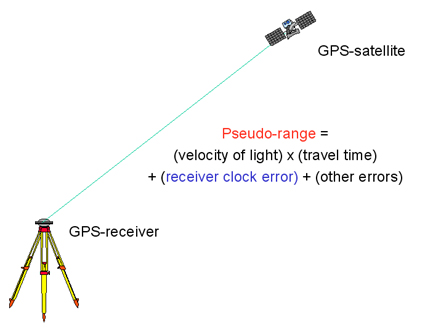

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = #...
df_sat_pos = #...

pseudorange = #...
sat_pos = #...

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = #...
m = #...

In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = #...

In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = #...

In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = #...
i = #...
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  #...
  return distance


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  #...
  return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


while (#convergence criteria):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = #...

       # compute the design matrix A
       # (1 marks)
       A = #...

       # compute the misclosure array w
       # (1 marks)
       w = #...

       # compute the corrections delta
       # (1 marks)
       delta = #...

       # update the states
       # (1 marks)
       x_hat = #...


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = #...


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w #...
       arr_delta #...
       arr_err_pos #...
       arr_i #...




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = #...

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = #...




In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)



In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
